In [1]:
#Dataset : http://cb.lk/covid_19
!wget http://cb.lk/covid_19

--2020-04-28 13:49:24--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-04-28 13:49:24--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-04-28 13:49:25--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-04-28 13:49:25--  https://www.dropbox.com/s/raw/7

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [0]:
Train_Path='CovidDataset/Train'
Val_Path='CovidDataset/Val'


In [0]:
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#CNN based model on keras.
#the choice of adding convolution or pooling layer is totally up to your choice
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])




In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [0]:
#Train from scratch
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=image.ImageDataGenerator(rescale=1/255)

In [18]:
train_gen=train_datagen.flow_from_directory(
    Train_Path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)


Found 224 images belonging to 2 classes.


In [19]:
train_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [20]:
val_gen=test_datagen.flow_from_directory(
    Val_Path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

Found 60 images belonging to 2 classes.


In [21]:
hist=model.fit_generator(
    train_gen,
    steps_per_epoch=8,
    epochs=10,
    validation_data=val_gen,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 92s 11s/step - loss: 1.1296 - accuracy: 0.5195 - val_loss: 0.6771 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 78s 10s/step - loss: 0.7004 - accuracy: 0.5312 - val_loss: 0.6837 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 77s 10s/step - loss: 0.6587 - accuracy: 0.6523 - val_loss: 0.5869 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 78s 10s/step - loss: 0.4911 - accuracy: 0.7734 - val_loss: 0.2788 - val_accuracy: 0.9167
Epoch 5/10
8/8 [==============================] - 78s 10s/step - loss: 0.3791 - accuracy: 0.8516 - val_loss: 0.2333 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 78s 10s/step - loss: 0.2929 - accuracy: 0.8828 - val_loss: 0.1247 - val_accuracy: 0.9333
Epoch 7/10
8/8 [==============================] - 83s 10s/step - loss: 0.2459 - accuracy: 0.8906 - val_loss: 0.2011 - val_accuracy: 0.9667
Epoch 8/10
8/8 [===========

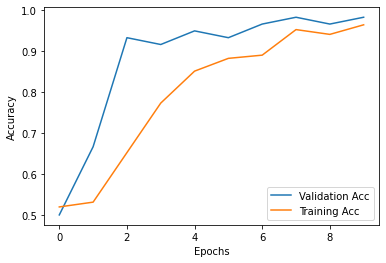

In [22]:
h=hist.history
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
import os
import cv2
path=os.path.join(Val_Path,"Normal/NORMAL2-IM-0395-0001.jpeg")
img = cv2.imread(path)
img = cv2.resize(img , (224,224))
img = np.expand_dims(img,axis=0)


pred = model.predict(img)
label = np.argmax(pred[0])
print(label)

0


In [42]:


img=image.load_img(path)
model.predict(img)

AttributeError: ignored